1. Implement the SIFT algorithm to detect and match key points between two images.


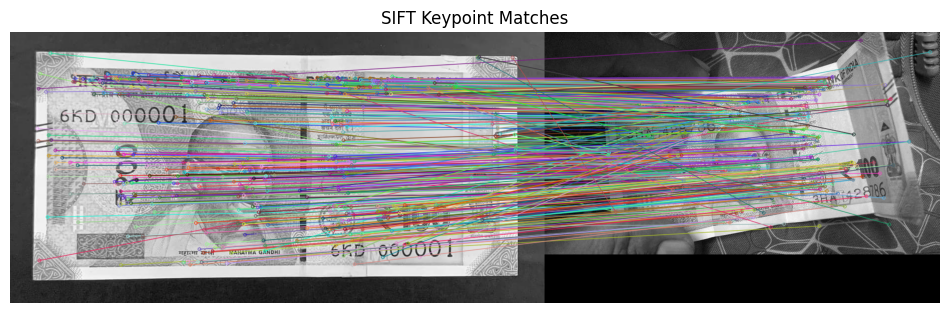

In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the two images (grayscale)
img1 = cv2.imread('note1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('note2.jpeg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to match descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
result_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Show image using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(result_img)
plt.title("SIFT Keypoint Matches")
plt.axis("off")
plt.show()

